## In this part I apply the previously obtained model to trade S&P 500

In [10]:
import yfinance as yf
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd

# Download S&P 500 data
data = yf.download("^GSPC", start="1986-01-01", end="2023-12-31", interval="1mo")
data = data.dropna()

# Define training and prediction periods
train_data = data.loc["1986-01-01":"2013-12-31"]
predict_data = data.loc["2014-01-01":"2023-12-31"]

[*********************100%%**********************]  1 of 1 completed


### Setting up the model

In [2]:
# Prepare observation sequences (open, high, low, close prices)
train_obs = train_data[["Open", "High", "Low", "Close"]].values
predict_obs = predict_data[["Open", "High", "Low", "Close"]].values

# Initialize HMM with 6 states
n_states = 6
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100, random_state=42)

# Train HMM
model.fit(train_obs)

C:\Users\1jafa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\1jafa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianHMM(n_components=6, n_iter=100, random_state=42)

### The prediction function follows the same logic as decribed in the paper

In [3]:
# Prediction function
def predict_hmm(model, train_data, test_data):
    predictions = []
    for i in range(len(test_data)):
        # Step 1: Calibrate HMM on the latest window
        train_block = train_data[-120:]  # Example: 10-year window (120 months)
        model.fit(train_block)
        
        # Step 2: Find similar historical sequence
        likelihoods = []
        for j in range(len(train_data) - len(train_block)):
            past_block = train_data[j:j+len(train_block)]
            score = model.score(past_block)
            likelihoods.append(score)
        
        # Identify most similar historical block
        best_match_idx = np.argmax(likelihoods)
        best_match_block = train_data[best_match_idx:best_match_idx+len(train_block)]
        
        # Step 3: Predict next month's close price
        price_diff = best_match_block[-1, 3] - best_match_block[-2, 3]  # Close price difference
        next_price = train_block[-1, 3] + price_diff
        predictions.append(next_price)
        
        # Update training data
        train_data = np.append(train_data, [test_data[i]], axis=0)
    
    return predictions

In [4]:
# Run predictions
predictions = predict_hmm(model, train_obs, predict_obs)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initializ

C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\1jafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

### The results are similar to those of the author
At least visually

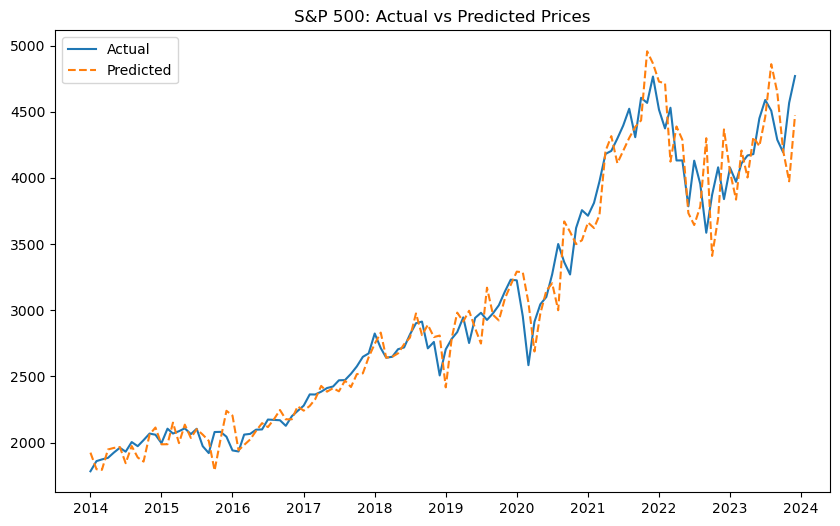

In [6]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(predict_data.index, predict_data["Close"], label="Actual")
plt.plot(predict_data.index, predictions, label="Predicted", linestyle="--")
plt.legend()
plt.title("S&P 500: Actual vs Predicted Prices")
plt.show()

R2 score also indicates model's good performance

In [11]:
from sklearn.metrics import r2_score

# Calculate R2
actual = predict_data["Close"].values
r2 = r2_score(actual, predictions)

print(f"R2 for the predictions: {r2}")

R2 for the predictions: 0.950245746281741


Saving the predictions to a dataframe to work on them

In [12]:
# Create a DataFrame
results_df = pd.DataFrame({
    "Date": predict_data.index,
    "Actual": predict_data["Close"].values,
    "Predicted": predictions
})

## results_df.to_csv('predictions.csv', index=False)  
print(results_df)  # Display the first few rows

          Date       Actual    Predicted
0   2014-01-01  1782.589966  1923.349976
1   2014-02-01  1859.449951  1798.039917
2   2014-03-01  1872.339966  1793.679932
3   2014-04-01  1883.949951  1947.329956
4   2014-05-01  1923.569946  1958.939941
..         ...          ...          ...
115 2023-08-01  4507.660156  4859.509766
116 2023-09-01  4288.049805  4646.240234
117 2023-10-01  4193.799805  4206.750000
118 2023-11-01  4567.799805  3974.189453
119 2023-12-01  4769.830078  4473.549805

[120 rows x 3 columns]


### Aplying HMM in order to trade S&P 500 monthly
We start with initial cash of USD 100,000 and then trade each month

In [13]:
# Add a column to track positions
results_df["Position"] = 0  # 1 = Buy, -1 = Sell, 0 = Hold
cash = 100000
position = 0
sell = 0
buy = 0
ss = 0

# Loop through the DataFrame and determine buy/sell signals
for i in range(1, len(results_df)):
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 1, "Actual"] and position == 1:
        # print(f"Holding on {results_df.loc[i-1, 'Date']}")
        continue # hold
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 1, "Actual"] and position == 0:
        position = 1
        buy = results_df.loc[i - 1, "Actual"] # buying at i-1
        # print(f"Buying at {results_df.loc[i - 1, 'Actual']} on {results_df.loc[i-1, 'Date']}")
        continue
    elif results_df.loc[i, "Predicted"] < results_df.loc[i - 1, "Actual"] and position == 1:
        cash = cash*(results_df.loc[i - 1, "Actual"]/buy) - 7 # selling at i-1
        sell = results_df.loc[i - 1, "Actual"]
        position = 0 # selling at i-1
        # print(f"Selling at {results_df.loc[i - 1, 'Actual']} on {results_df.loc[i-1, 'Date']}")
        # print(f"...Cash is ${cash}")
        
final_value_1m = cash

The final value for this trading strategy is 173K US dollars

In [14]:
print(final_value_1m)

173246.76995685216


## Let's now compare it to Buy & Hold strategy
It is clear that although the model is good at following the trend, b&h is superior

In [15]:
total_return = results_df.loc[i - 1, "Actual"] / results_df.loc[0, "Actual"]  # Total return over the period
tot_bh = 100000 * total_return
print(tot_bh)## Let's now compare it to Buy & Hold strategy

256245.12042989588


## Let's now try to short sell when model predicts a drop in price
But in this case model performs even worse

In [16]:
# Add a column to track positions
results_df["Position"] = 0  # 1 = Buy, -1 = Sell, 0 = Hold
cash = 100000
position = 0
sell = 0
buy = 0
ss = 0

# Loop through the DataFrame and determine buy/sell signals
for i in range(1, len(results_df)):
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 1, "Actual"] and position == 1:
        # print(f"Holding on {results_df.loc[i-1, 'Date']}")
        continue # hold
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 1, "Actual"] and position == 0:
        position = 1
        buy = results_df.loc[i - 1, "Actual"] # buying at i-1
        # print(f"Buying at {results_df.loc[i - 1, 'Actual']} on {results_df.loc[i-1, 'Date']}")
        if ss == 1:
            cash = cash*(sell/buy)
            # print(f"...Cash is ${cash}")
        continue
    elif results_df.loc[i, "Predicted"] < results_df.loc[i - 1, "Actual"] and position == 1:
        cash = cash*(results_df.loc[i - 1, "Actual"]/buy) - 7 # selling at i-1
        sell = results_df.loc[i - 1, "Actual"]
        ss = 1 # short sell
        position = 0 # selling at i-1
        # print(f"Selling at {results_df.loc[i - 1, 'Actual']} on {results_df.loc[i-1, 'Date']}")
        # int(f"...Cash is ${cash}")
        
final_value_1m_ss = cash

In [17]:
print(final_value_1m_ss) # 1 month timeframe, with shortselling

124918.0819897263


# The model is pretty good at guessing the trend
So why not exploit this in order to trade the trend instead of trading monthly??
We shall thus trade within a 3 month timeframe, this way we make sure (hopefully) that monthly fluctuations do not impact our earnings negatively

In [18]:
# Add a column to track positions
results_df["Position"] = 0  # 1 = Buy, -1 = Sell, 0 = Hold
cash = 100000
position = 0
buy = 0

# Loop through the DataFrame and determine buy/sell signals every 3 months ahead
for i in range(3, len(results_df), 3):  # Skip 3 months ahead each time
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 3, "Actual"] and position == 1:
        # Hold long position if predicted price is higher and we are already in position
        # print(f"Holding on {results_df.loc[i-3, 'Date']}")
        continue
    
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 3, "Actual"] and position == 0:
        # Buy signal: predicted price is higher 3 months ahead and we're not holding any stock
        position = 1
        buy = results_df.loc[i - 3, "Actual"]  # Buying at i-3 (price 3 months ago)
        # print(f"Buying at {buy} on {results_df.loc[i - 3, 'Date']}")
        continue
    
    elif results_df.loc[i, "Predicted"] < results_df.loc[i - 3, "Actual"] and position == 1:
        # Sell signal: predicted price is lower 3 months ahead and we are holding a position
        cash = cash * (results_df.loc[i - 3, "Actual"] / buy) - 7  # Selling at i-3
        sell = results_df.loc[i - 3, "Actual"]
        position = 0  # Exit position after selling
        # print(f"Selling at {sell} on {results_df.loc[i - 3, 'Date']}")
        # print(f"...Cash is ${cash}")

# Calculate the final value, including cash and any remaining position
final_value_3m = cash + (position * results_df.loc[len(results_df) - 1, "Actual"])

## As expected, trading the trend is much more profitable!

In [19]:
print(final_value_3m)

322009.27253568155


## There is still some hope that shortselling is not a bad idea
So let's test it on the 3 month timeframe in order to check if in this case shortselling will be profitable, or it will worsen our earnings as seen for 1 month trading

In [20]:
# Add a column to track positions
results_df["Position"] = 0  # 1 = Buy, -1 = Sell, 0 = Hold
cash = 100000
position = 0
sell = 0
buy = 0
ss = 0

# Loop through the DataFrame and determine buy/sell signals every 3 months ahead
for i in range(3, len(results_df), 3):  # Skip 3 months ahead each time
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 3, "Actual"] and position == 1:
        # Hold long position if predicted price is higher and we are already in position
        # print(f"Holding on {results_df.loc[i-3, 'Date']}")
        continue
    
    if results_df.loc[i, "Predicted"] > results_df.loc[i - 3, "Actual"] and position == 0:
        # Buy signal: predicted price is higher 3 months ahead and we're not holding any stock
        position = 1
        buy = results_df.loc[i - 3, "Actual"]  # Buying at i-3 (price 3 months ago)
        # print(f"Buying at {buy} on {results_df.loc[i - 3, 'Date']}")
        if ss == 1:
            cash = cash*(sell/buy)
            # print(f"...Cash is ${cash}")
        continue
    
    elif results_df.loc[i, "Predicted"] < results_df.loc[i - 3, "Actual"] and position == 1:
        # Sell signal: predicted price is lower 3 months ahead and we are holding a position
        cash = cash * (results_df.loc[i - 3, "Actual"] / buy) - 7  # Selling at i-3
        sell = results_df.loc[i - 3, "Actual"]
        ss = 1 # short sell
        position = 0  # Exit position after selling
        # print(f"Selling at {sell} on {results_df.loc[i - 3, 'Date']}")
        # print(f"...Cash is ${cash}")

# Calculate the final value, including cash and any remaining position
final_value_3m_ss = cash + (position * results_df.loc[len(results_df) - 1, "Actual"])


As the results suggest, shosrtselling turned out to be profitable when trading every 3 months. Thus, the conclusion is that HMM is very good at predicting S&P 500 (specifically the trend) over extended periods of time

In [21]:
print(final_value_3m_ss)

402938.3661512623


### Hidden Markov Model made USD 400 thousand from an initial investment of 100 thousand US dollars.
### This suggests a 300% return which is better than just buying and holding

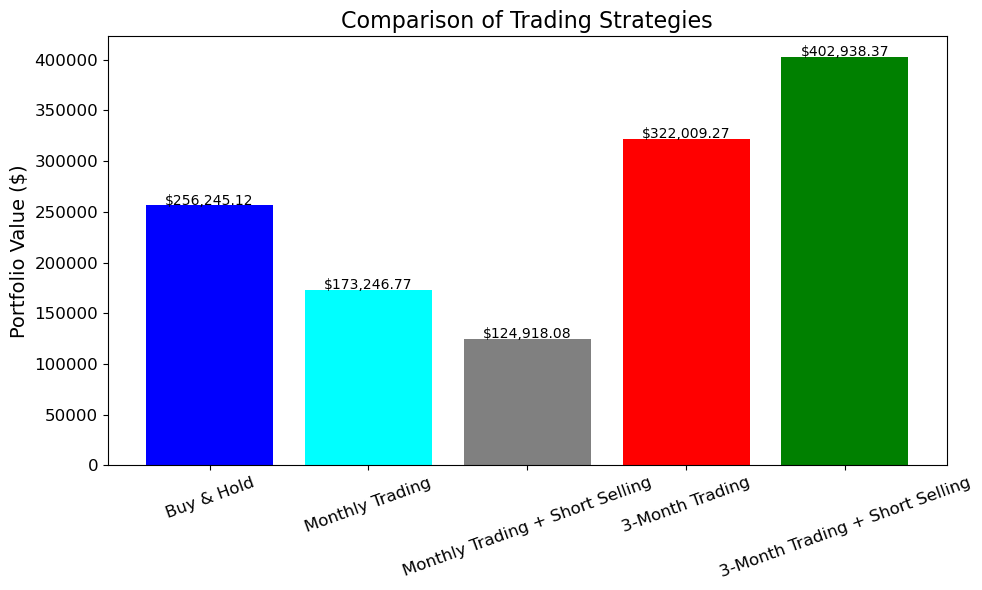

In [24]:
values = [
    round(tot_bh, 2), 
    round(final_value_1m, 2), 
    round(final_value_1m_ss, 2), 
    round(final_value_3m, 2), 
    round(final_value_3m_ss, 2)
]

strategies = [
    "Buy & Hold",
    "Monthly Trading",
    "Monthly Trading + Short Selling",
    "3-Month Trading",
    "3-Month Trading + Short Selling"
]

plt.figure(figsize=(10, 6))
plt.bar(strategies, values, color=['blue', 'cyan', 'gray', 'red', 'green'])
plt.title("Comparison of Trading Strategies", fontsize=16)
plt.ylabel("Portfolio Value ($)", fontsize=14)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value + 500, f"${value:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
